## **Predicting Iris Flower Species Based on petals and sepal features**

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')
iris.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [3]:
iris.drop(['id'], axis=1, inplace=True)

In [4]:
iris

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


## Preprocessing

In [5]:
iris.describe(include='all')

,sepal_len,sepal_wd,petal_len,petal_wd,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
iris.isnull().sum()

sepal_len    0
sepal_wd     0
petal_len    0
petal_wd     0
species      0
dtype: int64

## Separate data into targets and features

In [7]:
x = iris[['petal_len', 'petal_wd']]
y = iris['species']

## Split the data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

## Create new knn model

In [9]:
knn = KNeighborsClassifier()

## Set the parameters for the param_grid

In [10]:
param_grid = {'n_neighbors':np.arange(2, 10)}

In [11]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [12]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [13]:
knn_gscv.best_score_

0.9714285714285715

In [14]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_final.predict(x_test)

In [16]:
y_pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

In [17]:
knn_final.score(x_train, y_train)

0.9619047619047619

In [18]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [19]:
knn_final.score(x_test, y_test)

0.9777777777777777

In [20]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

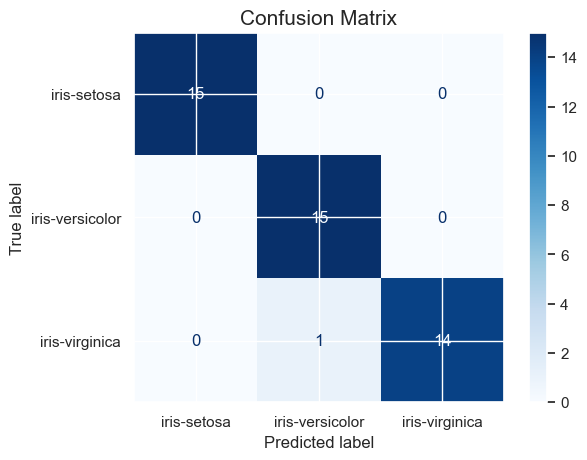

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', size=15)
plt.show()

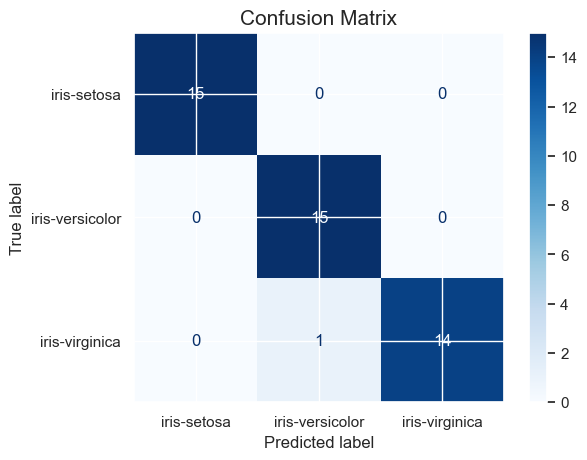

In [22]:
ConfusionMatrixDisplay.from_estimator(knn_final, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', size=15)
plt.show()

## Label prediction with new data

In [23]:
new_data = [[3.78, 1.20]]
knn_final.predict(new_data)

array(['iris-versicolor'], dtype=object)

## Probability prediction with new data

In [24]:
new_data_2 = np.array([[3.78, 1.20], [5.25, 1.20], [1.58, 1.20]])
knn_final.predict(new_data_2)

array(['iris-versicolor', 'iris-virginica', 'iris-setosa'], dtype=object)

In [25]:
knn_final.predict_proba(new_data_2)

array([[0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ]])